<a href="https://www.kaggle.com/code/nyinyeinaung/aqi-category-classification?scriptVersionId=146830031" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Kaggle Link: [Click Here](https://www.kaggle.com/code/nyinyeinaung/aqi-category-classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Collection

In [2]:
df = pd.read_csv("/kaggle/input/world-air-quality-index-by-city-and-coordinates/AQI and Lat Long of Countries.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16695 entries, 0 to 16694

Data columns (total 14 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   Country             16393 non-null  object 

 1   City                16695 non-null  object 

 2   AQI Value           16695 non-null  int64  

 3   AQI Category        16695 non-null  object 

 4   CO AQI Value        16695 non-null  int64  

 5   CO AQI Category     16695 non-null  object 

 6   Ozone AQI Value     16695 non-null  int64  

 7   Ozone AQI Category  16695 non-null  object 

 8   NO2 AQI Value       16695 non-null  int64  

 9   NO2 AQI Category    16695 non-null  object 

 10  PM2.5 AQI Value     16695 non-null  int64  

 11  PM2.5 AQI Category  16695 non-null  object 

 12  lat                 16695 non-null  float64

 13  lng                 16695 non-null  float64

dtypes: float64(2), int64(5), object(7)

memory usage: 1.8+ MB


In [4]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [5]:
print('No2 AQI Categories')
print(df['NO2 AQI Category'].value_counts())
print('\nCO AQI Categories')
print(df['CO AQI Category'].value_counts())
print('\nPM2.5 AQI Categories')
print(df['PM2.5 AQI Category'].value_counts())
print('\nOzone AQI Categories')
print(df['Ozone AQI Category'].value_counts())

No2 AQI Categories

Good        16684

Moderate       11

Name: NO2 AQI Category, dtype: int64



CO AQI Categories

Good                              16691

Unhealthy for Sensitive Groups        3

Moderate                              1

Name: CO AQI Category, dtype: int64



PM2.5 AQI Categories

Good                              7936

Moderate                          6882

Unhealthy for Sensitive Groups     881

Unhealthy                          828

Very Unhealthy                     115

Hazardous                           53

Name: PM2.5 AQI Category, dtype: int64



Ozone AQI Categories

Good                              15529

Moderate                            806

Unhealthy for Sensitive Groups      176

Unhealthy                           159

Very Unhealthy                       25

Name: Ozone AQI Category, dtype: int64


In [6]:
#dropping CO and NO2 aqi category cuz only one type - unnecessary for classification

df.drop(['NO2 AQI Category','CO AQI Category'],axis=1,inplace=True)

In [7]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,36,Good,0,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,5,Good,1,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,5,Good,1,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,39,Good,2,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,34,Good,0,20,Good,53.0167,20.8833


Text(0, 0.5, 'Latitude')

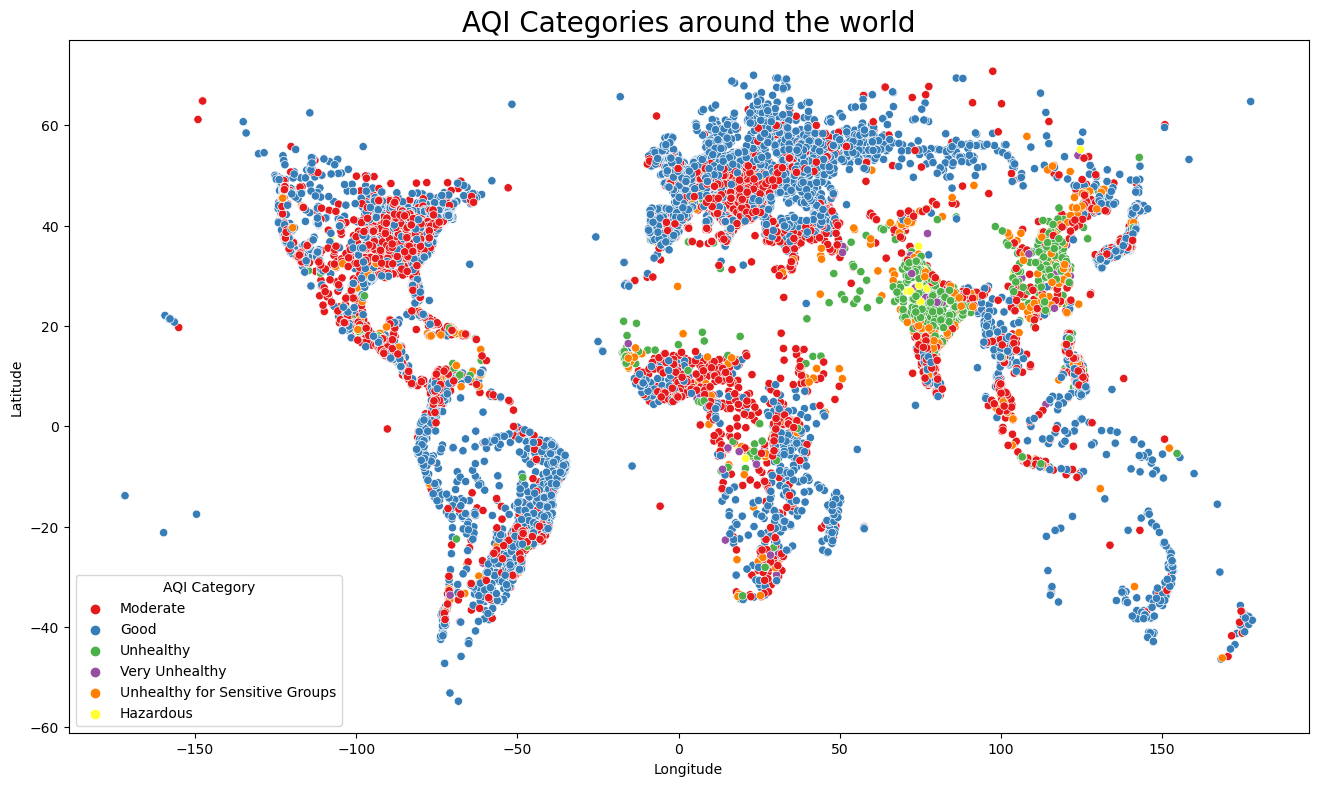

In [8]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Feature Engineering

In [9]:
ozoneCate = pd.get_dummies(df['Ozone AQI Category'],prefix="Ozone")
df=pd.concat([df,ozoneCate],axis=1)
df.drop(['Ozone AQI Category'],axis=1,inplace=True)

In [10]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,Moderate,44.7444,44.2031,1,0,0,0,0
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,Good,-5.2900,-44.4900,1,0,0,0,0
2,Brazil,Presidente Dutra,41,Good,1,5,1,41,Good,-11.2958,-41.9869,1,0,0,0,0
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,Moderate,37.1667,15.1833,1,0,0,0,0
4,Poland,Przasnysz,34,Good,1,34,0,20,Good,53.0167,20.8833,1,0,0,0,0


In [11]:
pmCate = pd.get_dummies(df['PM2.5 AQI Category'],prefix='PM2.5')
df = pd.concat([df,pmCate],axis=1)
df.drop(['PM2.5 AQI Category'],axis=1,inplace=True)

In [12]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,...,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,44.7444,44.2031,...,0,0,0,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,-5.2900,-44.4900,...,0,0,0,0,1,0,0,0,0,0
2,Brazil,Presidente Dutra,41,Good,1,5,1,41,-11.2958,-41.9869,...,0,0,0,0,1,0,0,0,0,0
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,37.1667,15.1833,...,0,0,0,0,0,0,1,0,0,0
4,Poland,Przasnysz,34,Good,1,34,0,20,53.0167,20.8833,...,0,0,0,0,1,0,0,0,0,0


In [13]:
## Too many cities to turn into numeric values -- drop
print('Num of countries: ',df['Country'].nunique())
print('Num of cities: ',df['City'].nunique())
df.drop(['City','Country'],axis=1,inplace=True)

Num of countries:  174

Num of cities:  14229


In [14]:
df.head()

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,51,Moderate,1,36,0,51,44.7444,44.2031,1,0,0,0,0,0,0,1,0,0,0
1,41,Good,1,5,1,41,-5.2900,-44.4900,1,0,0,0,0,1,0,0,0,0,0
2,41,Good,1,5,1,41,-11.2958,-41.9869,1,0,0,0,0,1,0,0,0,0,0
3,66,Moderate,1,39,2,66,37.1667,15.1833,1,0,0,0,0,0,0,1,0,0,0
4,34,Good,1,34,0,20,53.0167,20.8833,1,0,0,0,0,1,0,0,0,0,0


In [15]:
#model creation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

#split data into testing and training sets
X=df.drop('AQI Category',axis=1)
y=df['AQI Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Feature Scaling +Data Classification

In [16]:
## model creation process: create pipeline, fit pipeline with classification model, make prediction and evaluate the model using testing and cross validation
## 
def makePipe(model,name):
    '''
    Makes a pipeline with normalization and classification steps
    Fits the training data and label to the model
    '''
   
        
    pipeline = Pipeline([
        ('Scale',Normalizer()),
        ('classifier',model())
    ])
    
    #normalize test data
    normalized_x_test = pd.DataFrame(
        Normalizer().fit_transform(X_test),
        columns = X_test.columns)

    #fit the data to model + make predictions
    pipeline.fit(X_train,y_train)
    preds = pipeline.predict(normalized_x_test)
    
    print('Classifier: ' ,name)
    
    #print confusion matrix
    plotConfusionMatrix(preds,pipeline.classes_)
    
    eva = evaluation(preds)
    
    validation(pipeline)
    
    
    
def evaluation(preds):
    '''
    Prints out Classification reportand accuracy score
    '''
    print('\n',classification_report(y_test,preds))
    print('\nTraining Accuracy Score: ',accuracy_score(y_test,preds))
    return (accuracy_score(y_test,preds))
    
def plotConfusionMatrix(preds,classes):
        
    #make confusion matrix display
    cm=confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    fig =plt.figure(figsize=(20,8))
    disp.plot()
    plt.xticks(rotation = 75, ha = 'right')
    plt.title('Confusion Matrix')
    
    
def validation(model):
    '''
    Prints out Cross validation 5 folds accuracy and std
    '''
    scores = cross_val_score(model,X_train,y_train,cv=5)
    print('Cross Validation Accuracy: %0.2f (+/- %0.2f)'%(scores.mean(),scores.std()*2))


Classifier:  Gaussian Naive Bayes



                                 precision    recall  f1-score   support



                          Good       1.00      1.00      1.00      2337

                     Hazardous       0.90      1.00      0.95        27

                      Moderate       1.00      1.00      1.00      2093

                     Unhealthy       1.00      1.00      1.00       268

Unhealthy for Sensitive Groups       1.00      1.00      1.00       248

                Very Unhealthy       0.97      0.92      0.94        36



                      accuracy                           1.00      5009

                     macro avg       0.98      0.98      0.98      5009

                  weighted avg       1.00      1.00      1.00      5009





Training Accuracy Score:  0.9990017967658216

Cross Validation Accuracy: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

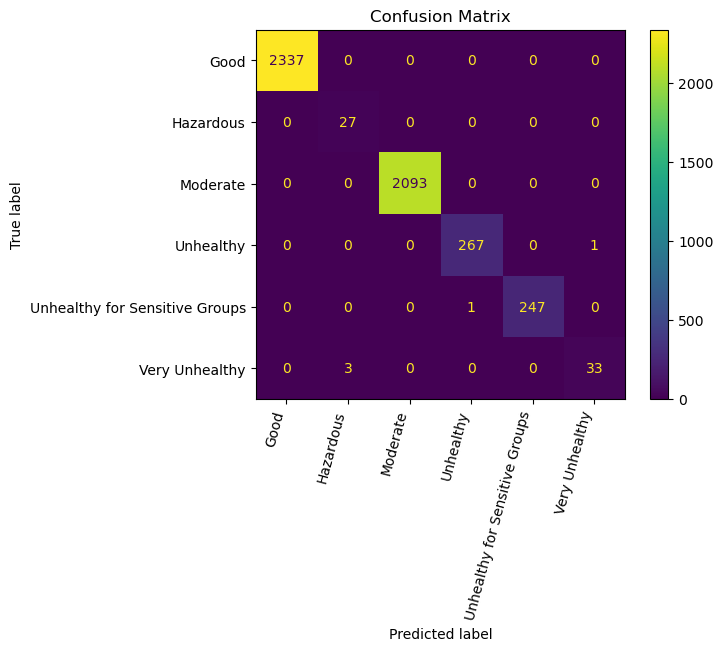

In [17]:
nbPipe = makePipe(GaussianNB, 'Gaussian Naive Bayes')

Classifier:  Support Vector Machine



                                 precision    recall  f1-score   support



                          Good       0.95      0.91      0.93      2337

                     Hazardous       0.00      0.00      0.00        27

                      Moderate       0.84      0.91      0.88      2093

                     Unhealthy       0.53      0.85      0.65       268

Unhealthy for Sensitive Groups       0.61      0.22      0.33       248

                Very Unhealthy       0.00      0.00      0.00        36



                      accuracy                           0.86      5009

                     macro avg       0.49      0.48      0.46      5009

                  weighted avg       0.85      0.86      0.85      5009





Training Accuracy Score:  0.8596526252745059

Cross Validation Accuracy: 0.84 (+/- 0.02)


<Figure size 2000x800 with 0 Axes>

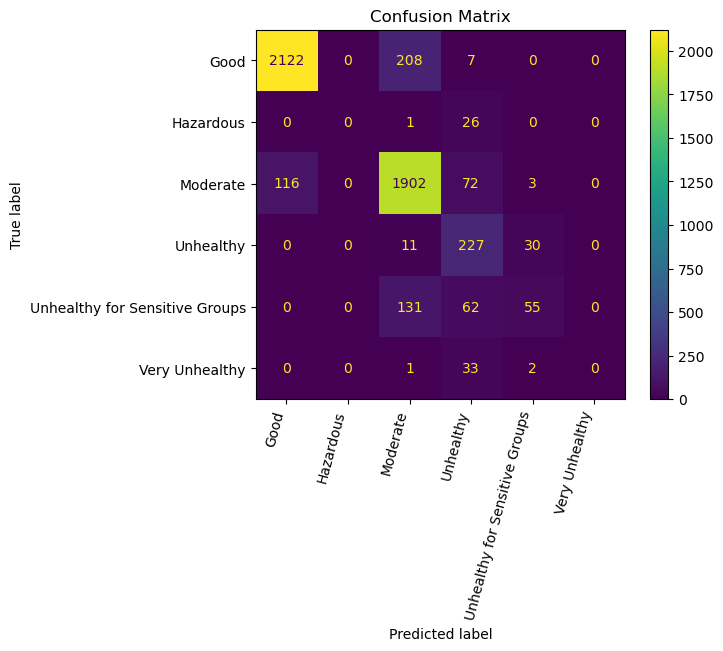

In [18]:
svmPipe = makePipe(SVC,'Support Vector Machine')

Classifier:  Decision Tree



                                 precision    recall  f1-score   support



                          Good       1.00      1.00      1.00      2337

                     Hazardous       1.00      1.00      1.00        27

                      Moderate       1.00      1.00      1.00      2093

                     Unhealthy       1.00      1.00      1.00       268

Unhealthy for Sensitive Groups       1.00      1.00      1.00       248

                Very Unhealthy       1.00      1.00      1.00        36



                      accuracy                           1.00      5009

                     macro avg       1.00      1.00      1.00      5009

                  weighted avg       1.00      1.00      1.00      5009





Training Accuracy Score:  1.0

Cross Validation Accuracy: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

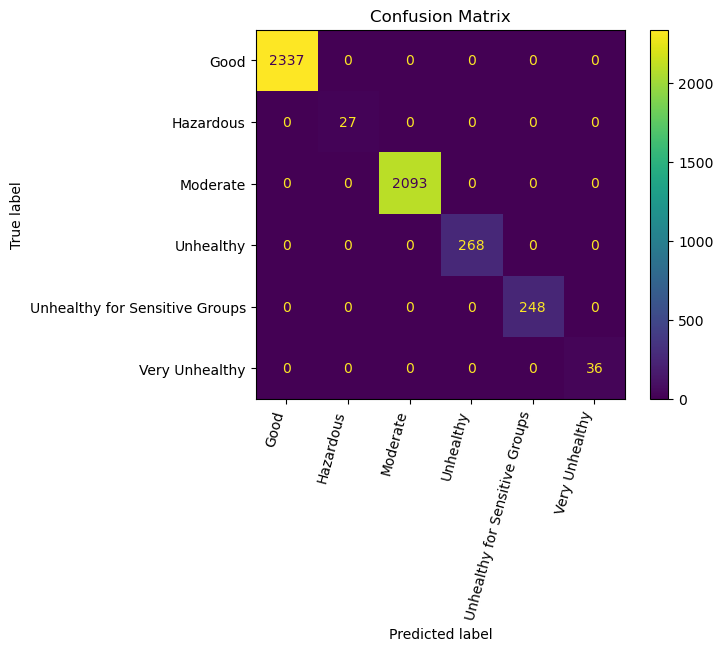

In [19]:
dtPipe=makePipe(DecisionTreeClassifier,'Decision Tree')

Classifier:  Random Forest



                                 precision    recall  f1-score   support



                          Good       1.00      1.00      1.00      2337

                     Hazardous       1.00      1.00      1.00        27

                      Moderate       1.00      1.00      1.00      2093

                     Unhealthy       1.00      1.00      1.00       268

Unhealthy for Sensitive Groups       1.00      1.00      1.00       248

                Very Unhealthy       1.00      1.00      1.00        36



                      accuracy                           1.00      5009

                     macro avg       1.00      1.00      1.00      5009

                  weighted avg       1.00      1.00      1.00      5009





Training Accuracy Score:  1.0

Cross Validation Accuracy: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

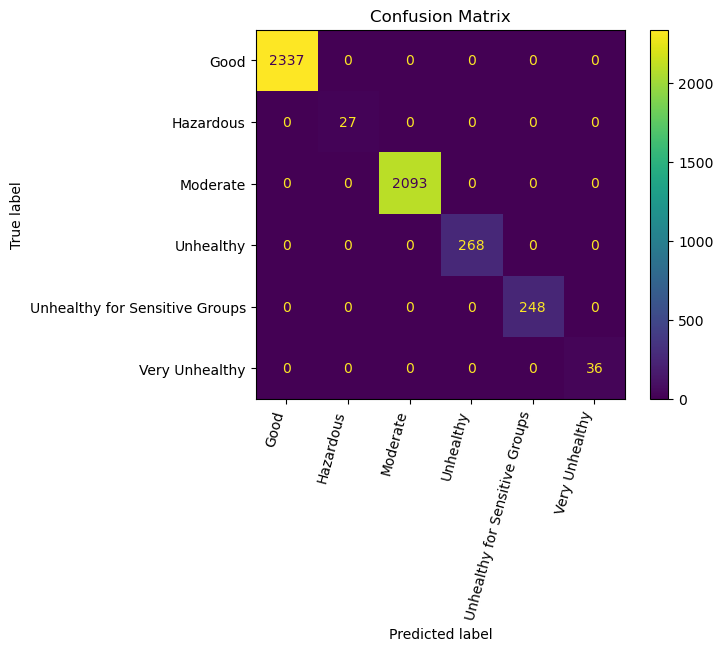

In [20]:
rfPipe = makePipe(RandomForestClassifier,'Random Forest')

Classifier:  K-Nearest Neighbors



                                 precision    recall  f1-score   support



                          Good       0.96      0.93      0.95      2337

                     Hazardous       0.88      0.52      0.65        27

                      Moderate       0.91      0.94      0.92      2093

                     Unhealthy       0.78      0.83      0.80       268

Unhealthy for Sensitive Groups       0.73      0.72      0.72       248

                Very Unhealthy       0.63      0.67      0.65        36



                      accuracy                           0.91      5009

                     macro avg       0.81      0.77      0.78      5009

                  weighted avg       0.92      0.91      0.91      5009





Training Accuracy Score:  0.9145538031543222

Cross Validation Accuracy: 0.90 (+/- 0.01)


<Figure size 2000x800 with 0 Axes>

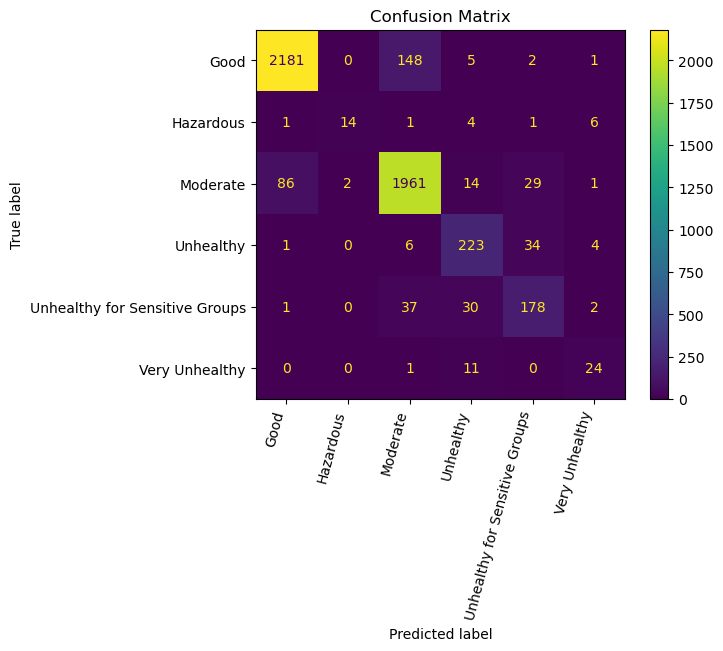

In [21]:
knnPipe = makePipe(KNeighborsClassifier,'K-Nearest Neighbors')

In [22]:
res={'testAcc':[0.999,0.86,1.0,1.0,0.915],'valAcc':[1,0.84,1,1,0.9]}
names=['Naive Bayes','SVM','Decision Tree','Random Forest','K-Nearest Neighbor']
a =  pd.DataFrame(res,index=names)
a.head()

,testAcc,valAcc
Naive Bayes,0.999,1.00
SVM,0.860,0.84
Decision Tree,1.000,1.00
Random Forest,1.000,1.00
K-Nearest Neighbor,0.915,0.90


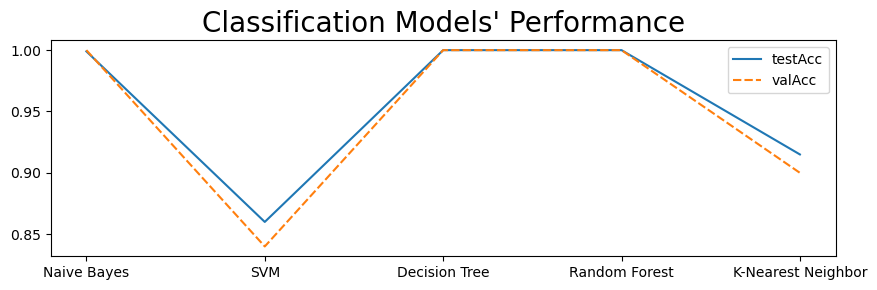

In [23]:
fig = plt.figure(figsize=(9,3))
sns.lineplot(a)
plt.title('Classification Models\' Performance',fontsize=20)
plt.tight_layout()

# Conclusion
**5 classification models were created:**
* Naive Bayes
* SVM
* Decision Tree
* Random Forest
* K-Nearest Neighbor

The data was split into 70% training data and 30% testing data. The prediction label was the 'AQI Category' with 6 classes.
Normalization was applied to the data training and testing after data splitting was done. The models were created using the normalized training data and tested with the normalized testing  data.

The data was normalized with the goal of putting every feature into the same scale. The thought process was that the latitude and longitude features could span from 90 to -90 and 180 to -180 respectively whilst the AQI values flucutated between 0 and 500. Therefore, sklearn's normalizer was used to put the features at a more even scale to optimize the classification accuracy.

Of the 5 models, Decision Tree and Random Forest classifiers produced  perfect classification results with 100% testing accuracy and 100% cross validation accuracy.The Naive Bayes algorithm is at the second place with 99.9% testing accuracy and 100% cross validation accuracy. The KNN model produced tesing accuracy of 91.5% and validation accuracy 90% with std of 1% respectively. Lastly, the SVM model produced the worst result of the 5 models with 86% testing accuracy and 84% validation accruacy with std of 2%

Overall the classification models were able to classify the AQI Category with very great results